# Unemployment Analysis with Python

### Importing necessary libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Loading the data

In [3]:
df = pd.read_csv('Unemployment in India.csv')

In [4]:
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [5]:
df.info

<bound method DataFrame.info of              Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0    Andhra Pradesh   31-05-2019    Monthly                              3.65   
1    Andhra Pradesh   30-06-2019    Monthly                              3.05   
2    Andhra Pradesh   31-07-2019    Monthly                              3.75   
3    Andhra Pradesh   31-08-2019    Monthly                              3.32   
4    Andhra Pradesh   30-09-2019    Monthly                              5.17   
..              ...          ...        ...                               ...   
763             NaN          NaN        NaN                               NaN   
764             NaN          NaN        NaN                               NaN   
765             NaN          NaN        NaN                               NaN   
766             NaN          NaN        NaN                               NaN   
767             NaN          NaN        NaN                               NaN

In [6]:
df.shape

(768, 7)

In [7]:
df.isnull().sum()

Region                                      28
 Date                                       28
 Frequency                                  28
 Estimated Unemployment Rate (%)            28
 Estimated Employed                         28
 Estimated Labour Participation Rate (%)    28
Area                                        28
dtype: int64

In [8]:
df = df.dropna()

In [9]:
df.isnull().sum()

Region                                      0
 Date                                       0
 Frequency                                  0
 Estimated Unemployment Rate (%)            0
 Estimated Employed                         0
 Estimated Labour Participation Rate (%)    0
Area                                        0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [12]:
df.tail()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban
753,West Bengal,30-06-2020,Monthly,9.86,9088931.0,37.57,Urban


In [13]:
df.columns=['State','Date','Frequency','Estimated Unemployed Rate','Estimated Employed','Estimated Labour Participation Rate','Area']

In [14]:
df.tail()

,State,Date,Frequency,Estimated Unemployed Rate,Estimated Employed,Estimated Labour Participation Rate,Area
749,West Bengal,29-02-2020,Monthly,7.55,10871168.0,44.09,Urban
750,West Bengal,31-03-2020,Monthly,6.67,10806105.0,43.34,Urban
751,West Bengal,30-04-2020,Monthly,15.63,9299466.0,41.20,Urban
752,West Bengal,31-05-2020,Monthly,15.22,9240903.0,40.67,Urban
753,West Bengal,30-06-2020,Monthly,9.86,9088931.0,37.57,Urban


In [15]:
# to print the state with highest employment
print("State with highest unemployment: ",df['State'].value_counts().idxmax())

State with highest unemployment:  Andhra Pradesh


In [16]:
# to print the state with lowest employment
print("State with lowest unemployment: ",df['State'].value_counts().idxmin())

State with lowest unemployment:  Chandigarh


In [17]:
# to print month of unemployment
import datetime as dt
import calendar

In [18]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df['month_int'] = df['Date'].dt.month
df['month'] = df['month_int'].apply(lambda x: calendar.month_abbr[x])

In [19]:
# to print the month with highest unemployment
print("Month with highest unemployment: ", df['month'].value_counts().idxmax())

Month with highest unemployment:  May


In [20]:
# to print the month with lowest unemployment
print("Month with lowest unemployment: ", df['month'].value_counts().idxmin())

Month with lowest unemployment:  Apr


In [21]:
df.head()

,State,Date,Frequency,Estimated Unemployed Rate,Estimated Employed,Estimated Labour Participation Rate,Area,month_int,month
0,Andhra Pradesh,2019-05-31,Monthly,3.65,11999139.0,43.24,Rural,5,May
1,Andhra Pradesh,2019-06-30,Monthly,3.05,11755881.0,42.05,Rural,6,Jun
2,Andhra Pradesh,2019-07-31,Monthly,3.75,12086707.0,43.50,Rural,7,Jul
3,Andhra Pradesh,2019-08-31,Monthly,3.32,12285693.0,43.97,Rural,8,Aug
4,Andhra Pradesh,2019-09-30,Monthly,5.17,12256762.0,44.68,Rural,9,Sep


In [22]:
df.drop(columns=['Frequency','month_int'])

,State,Date,Estimated Unemployed Rate,Estimated Employed,Estimated Labour Participation Rate,Area,month
0,Andhra Pradesh,2019-05-31,3.65,11999139.0,43.24,Rural,May
1,Andhra Pradesh,2019-06-30,3.05,11755881.0,42.05,Rural,Jun
2,Andhra Pradesh,2019-07-31,3.75,12086707.0,43.50,Rural,Jul
3,Andhra Pradesh,2019-08-31,3.32,12285693.0,43.97,Rural,Aug
4,Andhra Pradesh,2019-09-30,5.17,12256762.0,44.68,Rural,Sep
...,...,...,...,...,...,...,...
749,West Bengal,2020-02-29,7.55,10871168.0,44.09,Urban,Feb
750,West Bengal,2020-03-31,6.67,10806105.0,43.34,Urban,Mar
751,West Bengal,2020-04-30,15.63,9299466.0,41.20,Urban,Apr
752,West Bengal,2020-05-31,15.22,9240903.0,40.67,Urban,May


In [23]:
# top 10 states with highest unemployment
df_10 = df[['State','Estimated Unemployed Rate']].groupby('State').sum().sort_values(by='Estimated Unemployed Rate', ascending=False)

In [24]:
df_10.head(10)

,Estimated Unemployed Rate
State,
Tripura,793.81
Haryana,735.93
Jharkhand,576.38
Bihar,529.71
Himachal Pradesh,519.13
Delhi,461.87
Rajasthan,393.63
Uttar Pradesh,351.44
Jammu & Kashmir,339.96


### Visualization

Text(0, 0.5, 'Percentage of people unemployed')

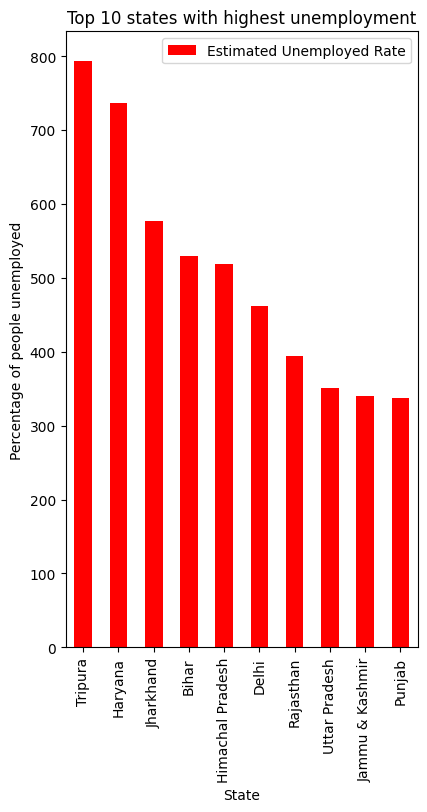

In [25]:
fig = plt.figure()
ax0 = fig.add_subplot(1,2,1)
df_10[:10].plot(kind="bar", color="red", figsize=(10,8), ax=ax0)
ax0.set_title("Top 10 states with highest unemployment")
ax0.set_xlabel("State")
ax0.set_ylabel("Percentage of people unemployed")

In [26]:
# months with highest unemployemnt

df_m = df[["month","Estimated Unemployed Rate"]].groupby("month").sum().sort_values(by="Estimated Unemployed Rate", ascending=False)

In [27]:
df_m.head(10)

,Estimated Unemployed Rate
month,
May,1747.85
Apr,1205.72
Jun,1097.56
Mar,556.43
Oct,544.55
Nov,542.76
Feb,528.13
Jan,527.39
Aug,510.81


Text(0, 0.5, 'Percentage of people unemployed')

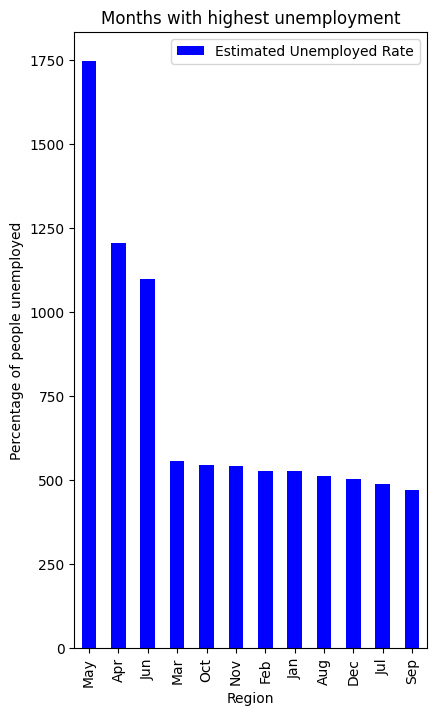

In [28]:
#visulaization
fig=plt.figure()
ax0=fig.add_subplot(1,2,1)
df_m[:12].plot(kind="bar",color="blue",figsize=(10,8),ax=ax0)
ax0.set_title("Months with highest unemployment")
ax0.set_xlabel("Region")
ax0.set_ylabel("Percentage of people unemployed")

### Conclusion

1) State with highest unemployment: Andhra Pradesh
2) State with lowest unemployment: Chandigarh
3) Month with highest unemployment: May
4) Month with lowest unemployment: April